In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# differenciate Apple and Orange
fruits = pd.read_csv('c:/Users/igor/Downloads/Data-Sets-ML/fruits.csv')
fruits.shape

(60, 4)

In [46]:
fruits.head(10)

,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange
5,Orange,0.911,130,Orange
6,Orange,0.903,135,Orange
7,Orange,0.918,105,Orange
8,Orange,0.914,132,Orange
9,Orange,0.936,127,Orange


In [4]:
fruits.label.value_counts()

Orange    30
Apple     30
Name: label, dtype: int64

In [4]:
fruits.color.value_counts()

Green              20
Orange             10
Greenish yellow    10
Reddish yellow     10
Red                10
Name: color, dtype: int64

In [5]:
fruits.isna().sum()

color         0
sphericity    0
weight        0
label         0
dtype: int64

In [6]:
fruits.groupby(['color','label']).count()

sphericity  weight
color           label                     
Green           Apple           10      10
                Orange          10      10
Greenish yellow Orange          10      10
Orange          Orange          10      10
Red             Apple           10      10
Reddish yellow  Apple           10      10

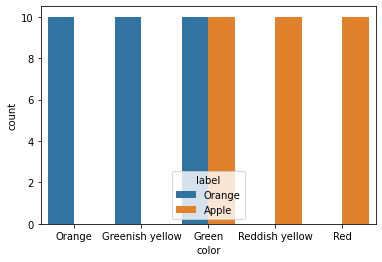

In [7]:
sns.countplot(x='color',data=fruits,hue='label')
plt.show()

In [8]:
fruits.groupby('label').describe()

sphericity                                                             \
            count      mean       std    min     25%     50%      75%    max   
label                                                                          
Apple        30.0  0.768133  0.042097  0.710  0.7285  0.7625  0.80250  0.845   
Orange       30.0  0.873033  0.042740  0.808  0.8350  0.8710  0.91325  0.947   

       weight                                                             
        count        mean        std    min    25%    50%     75%    max  
label                                                                     
Apple    30.0  161.966667  12.075862  140.0  152.5  164.0  171.50  184.0  
Orange   30.0  123.533333  14.129288  101.0  110.0  124.0  133.75  149.0

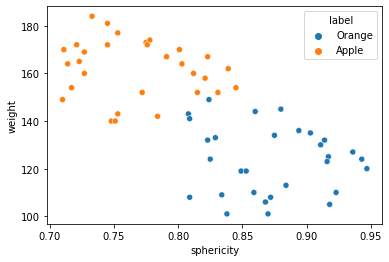

In [9]:
# 1fist method Scatterplot for continuous data
sns.scatterplot(x='sphericity',y='weight',data=fruits, hue='label')
plt.show()

In [11]:
# Implement Decision Tree

In [10]:
# selection of capital X feature and y target
X = fruits[['sphericity','weight']]
y = fruits['label']

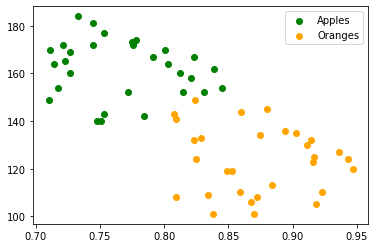

In [12]:
# 2nd method
plt.scatter(x='sphericity',y='weight',data=X[y=='Apple'],c='green',label='Apples')
plt.scatter(x='sphericity',y='weight',data=X[y=='Orange'],c='orange',label='Oranges')
plt.legend()
plt.show()

In [13]:
# 1 Step import sklearn.tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [14]:
# 2nd step model training and fiting
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

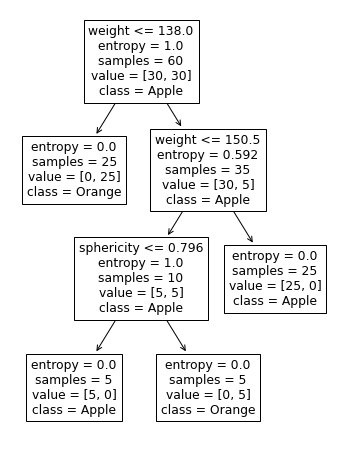

In [15]:
plt.figure(figsize=[6,8])
plot_tree(model,feature_names=['sphericity','weight'],class_names=['Apple','Orange'])
plt.show()

In [18]:
X.shape,y.shape

((60, 2), (60,))

In [40]:
# Session 104 on test and split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((45, 2), (15, 2), (45,), (15,))

In [43]:
X_train.index

Int64Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19,
            34,  5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8,
            55, 52, 48, 29, 25, 28, 49,  0, 15, 36,  9],
           dtype='int64')

In [42]:
y_train.index

Int64Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19,
            34,  5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8,
            55, 52, 48, 29, 25, 28, 49,  0, 15, 36,  9],
           dtype='int64')

In [51]:
X_test.index

Int64Index([31, 3, 38, 27, 21, 17, 46, 2, 23, 26, 35, 39, 20, 37, 7], dtype='int64')

In [52]:
y_test.index

Int64Index([31, 3, 38, 27, 21, 17, 46, 2, 23, 26, 35, 39, 20, 37, 7], dtype='int64')

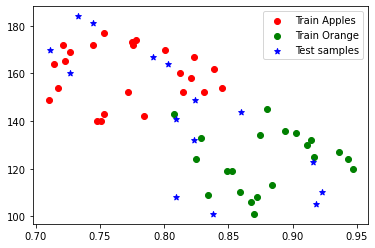

In [55]:
plt.scatter(x='sphericity',y='weight',data=X_train[y_train=='Apple'],label='Train Apples',c='red')
plt.scatter(x='sphericity',y='weight',data=X_train[y_train=='Orange'],label='Train Orange',c='green')
plt.scatter(x='sphericity',y='weight',data=X_test,label='Test samples',c='blue',marker='*')
plt.legend()
plt.show()

In [57]:
# Train the model
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

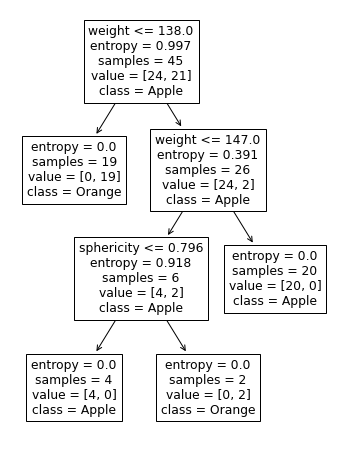

In [58]:
plt.figure(figsize=[6,8])
plot_tree(model,feature_names=['sphericity','weight'],class_names=['Apple','Orange'])
plt.show()

In [60]:
# Predict the X_test
y_predict = model.predict(X_test)
y_predict

array(['Apple', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [62]:
#compare real result y_test to the predict(y_predict)
y_test.values

array(['Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [63]:
# out of 15 test fruits the machine predict 14 correct and missed apple to orange here the score below
14/15

0.9333333333333333

In [67]:
(y_predict==y_test)

31     True
3      True
38     True
27     True
21    False
17     True
46     True
2      True
23     True
26     True
35     True
39     True
20     True
37     True
7      True
Name: label, dtype: bool

In [68]:
# Predict Score
(y_predict==y_test).sum()/len(y_test)

0.9333333333333333

In [70]:
# Or use libary metric to see score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9333333333333333